## Part a)

I will be using string concatenation to construct the Hamiltonian matrix 

The Hamiltonian matrix for transverse field Ising model is

$$H = -J \sum_{i=1}^N s^{z}_i s^{z}_{i+1} - h \sum_{i=1}^N (s^{+}_i + s^{-}_i  ) $$

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

I build the following **flip_operator** function to flip the spin from either 
1.   0 to 1 
2.   1 to 0 


In [36]:
def flip_operator(i):
  if i==1:
    return 0
  elif i==0:
    return 1

In [37]:
# Matrix Construction

def matrix_construction(h,N):

  dimension=2**N

  #spin chain with all spin-down
  z='0'*N

  # initialize hamiltonian
  H=np.zeros((dimension,dimension))

  for a in range(dimension): 
    J = 1
    state_chain=bin(a)[2:] 
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain
    #print(state_chain)

    for i in range(N): 
      j=np.mod(i+1,N) 
      #1. For the -S^Z_(i) S^Z_(i+1) operator 
      if state_chain[i]==state_chain[j]: 
        H[a,a]+=-1
      else:                            
        H[a,a]+=1 
    
      #2. For the (-h)*(S+_{i} + S-_{i}) operator
      element_at_i = int(state_chain[i])
      flipped_element_at_i = flip_operator(element_at_i)
      flipped_state_chain = str(state_chain[:i]+str(flipped_element_at_i)+state_chain[i+1:])
      b = int(flipped_state_chain,2)
      H[a,b]+=-h
  
  return H

Generate the data for h = 0 to h = 2 for N = 10. Besides, I have stored the eigenvector and eigenvalues in the numpy array and store it for further manipulation later. 

In [38]:
h_array = np.arange(0,2.05,0.05)
N = 10 
for h in h_array:
  
  H = matrix_construction(h,N)

  eig_value=np.real(np.linalg.eig(H)[0])# eigenvalues
  eig_vec=np.real(np.linalg.eig(H)[1]) # eigenstates

  idx_sorted1 = np.argsort(eig_value)
  eig_value = eig_value[idx_sorted1][:50]
  eig_vec = eig_vec[:,idx_sorted1]
  eig_value_normalized = eig_value - eig_value[0]

  h_round = np.round(h,3)

  np.save(f"eig_value_at_{h_round}",eig_value_normalized) # store the normalized eigenvalues
  np.save(f"eig_vec_at_{h_round}",eig_vec) # store the eigenvector 

  #print(f"Finished h = {h}")

Finished h = 0.0
Finished h = 0.05
Finished h = 0.1
Finished h = 0.15000000000000002
Finished h = 0.2
Finished h = 0.25
Finished h = 0.30000000000000004
Finished h = 0.35000000000000003
Finished h = 0.4
Finished h = 0.45
Finished h = 0.5
Finished h = 0.55
Finished h = 0.6000000000000001
Finished h = 0.65
Finished h = 0.7000000000000001
Finished h = 0.75
Finished h = 0.8
Finished h = 0.8500000000000001
Finished h = 0.9
Finished h = 0.9500000000000001
Finished h = 1.0
Finished h = 1.05
Finished h = 1.1
Finished h = 1.1500000000000001
Finished h = 1.2000000000000002
Finished h = 1.25
Finished h = 1.3
Finished h = 1.35
Finished h = 1.4000000000000001
Finished h = 1.4500000000000002
Finished h = 1.5
Finished h = 1.55
Finished h = 1.6
Finished h = 1.6500000000000001
Finished h = 1.7000000000000002
Finished h = 1.75
Finished h = 1.8
Finished h = 1.85
Finished h = 1.9000000000000001
Finished h = 1.9500000000000002
Finished h = 2.0


Below are the code I used to download, upload and rename the stored the data. I hide it cause it does not affect the code running. The code will run properly if you run all the code in this .ipynb file at once. 

In [39]:
"""
#load the data back 
from google.colab import files
#files.download("/content/file.zip")


import os
data_path = "/content"
name_list=os.listdir(data_path)
name_list.remove('.config')
name_list.remove('sample_data')
name_list.remove('.ipynb_checkpoints')

for name in name_list:
  front = name.split("_")[0:3]
  number = np.round(float(name.split("_")[3:][0].replace(".npy","")),3)
  new_name = front[0]+"_"+front[1]+"_"+front[2]+"_"+str(number)+".npy"
  source = data_path +"/"+name
  os.rename(source, new_name)
"""

'\n#load the data back \nfrom google.colab import files\n#files.download("/content/file.zip")\n\n\nimport os\ndata_path = "/content"\nname_list=os.listdir(data_path)\nname_list.remove(\'.config\')\nname_list.remove(\'sample_data\')\nname_list.remove(\'.ipynb_checkpoints\')\n\nfor name in name_list:\n  front = name.split("_")[0:3]\n  number = np.round(float(name.split("_")[3:][0].replace(".npy","")),3)\n  new_name = front[0]+"_"+front[1]+"_"+front[2]+"_"+str(number)+".npy"\n  source = data_path +"/"+name\n  os.rename(source, new_name)\n'

(0.0, 7.0)

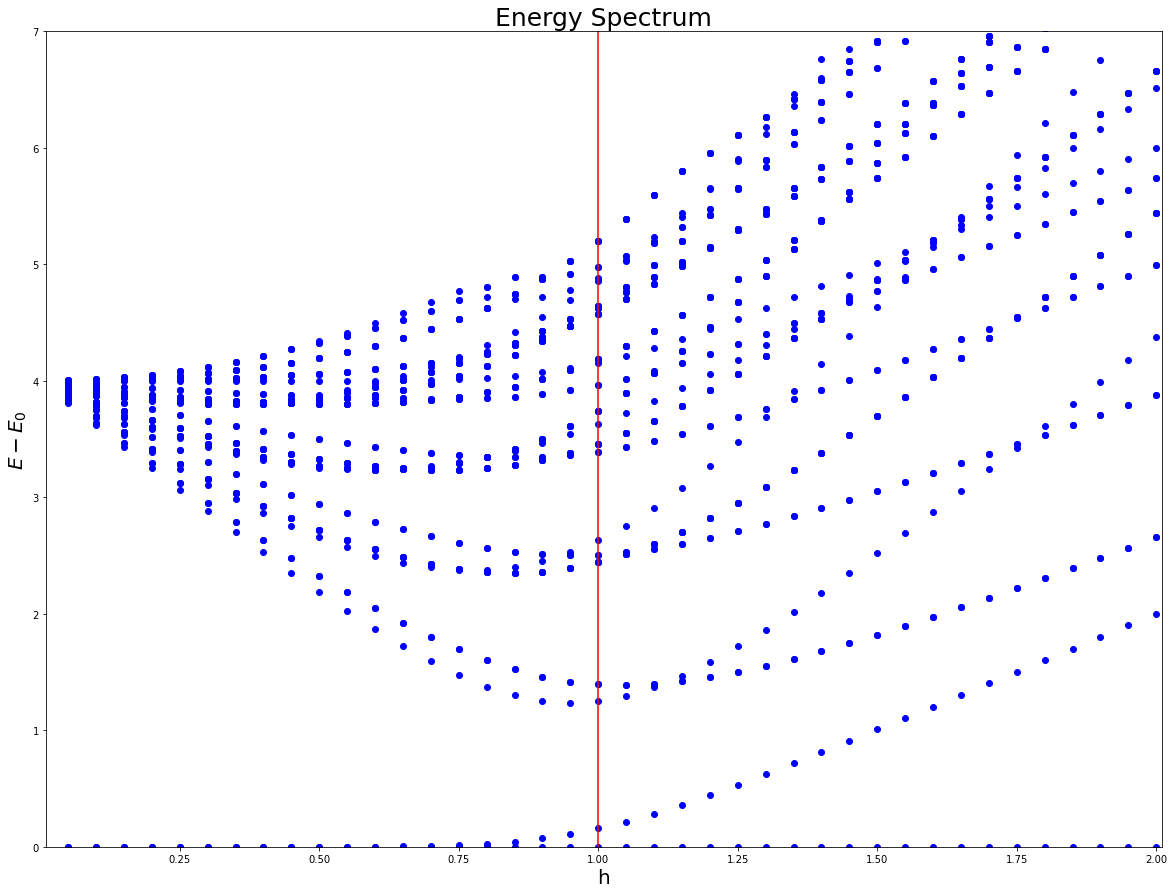

In [40]:
h_array = np.arange(0,2.05,0.05)
plt.figure(figsize=(20,15))
plt.title("Energy Spectrum",size=25)

for h in h_array:
  h_round = np.round(h,3)
  temp_array=np.load(f"/content/eig_value_at_{h_round}.npy")
  for y in temp_array:
    plt.scatter(h,y,color="blue")

plt.ylabel(r"$E-E_{0}$",size=20)
plt.xlabel("h",size=20)
plt.axvline(1,color="red")
plt.xlim(0.01,2.01)
plt.ylim(0,7)

In [41]:
"""
# Download the data generated 
!zip -r /content/file.zip /content
from google.colab import files
files.download("/content/file.zip")
"""

'\n# Download the data generated \n!zip -r /content/file.zip /content\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

### Part b)

In [49]:
def abs_mz(int_k,N):
  
  mz = 0 

  state_chain=bin(int_k)[2:]
  z='0'*N
  l=len(state_chain)
  state_chain=z[0:N-l]+state_chain

  n_up = state_chain.count("1")
  n_down = state_chain.count("0") 

  return np.abs(1/N * (n_up - n_down))

In [50]:
def calculate_average_mz_at_h(h,N):

  h_round = np.round(h,3)
  eig_vec_array_at_h = np.load(f"eig_vec_at_{h_round}.npy")
  average_mz = 0 

  for int_k,ck in enumerate(eig_vec_array_at_h[:,0]):
    ck_square = np.abs(ck)**2
    mzk = abs_mz(int_k,N)
    average_mz += ck_square * mzk
  
  return average_mz

In [44]:
# at a particular h 
N = 10 
dimension = 2**N
average_mz_list = []

for h in h_array:
  h_round = np.round(h,3)
  y = calculate_average_mz_at_h(h,N)
  average_mz_list.append(y)

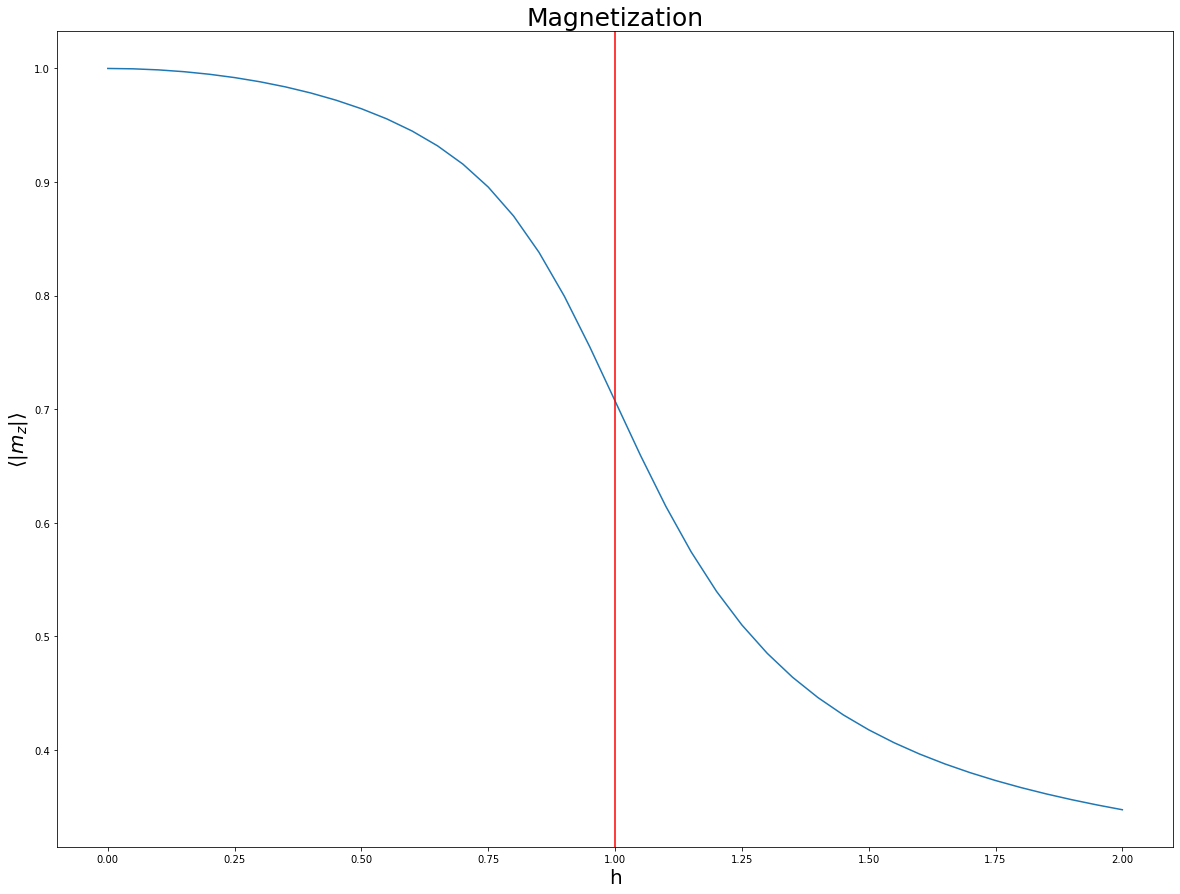

In [45]:
#Plot graph 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,15))
plt.plot(h_array,average_mz_list)
plt.title("Magnetization",size=25)
plt.xlabel("h",size=20)
plt.ylabel(r"$\langle |m_{z}| \rangle$",size=20)
plt.axvline(1,color="red")

### Part c) 

In [46]:
def calculate_average_mz_square_at_h(h,N):

  h_round = np.round(h,3)
  eig_vec_array_at_h = np.load(f"eig_vec_at_{h_round}.npy")
  average_mz_square = 0 

  for int_k,ck in enumerate(eig_vec_array_at_h[:,0]):
    ck_square = np.abs(ck)**2
    mzk_square = abs_mz(int_k,N)**2
    average_mz_square += ck_square * mzk_square
  
  return average_mz_square

In [47]:
N = 10 
dimension = 2**N
variance_list = []

for h in h_array:
  h_round = np.round(h,3)
  average_mz = calculate_average_mz_at_h(h,N)
  average_mz_square = calculate_average_mz_square_at_h(h,N)
  y = average_mz_square - average_mz**2

  variance_list.append(y)

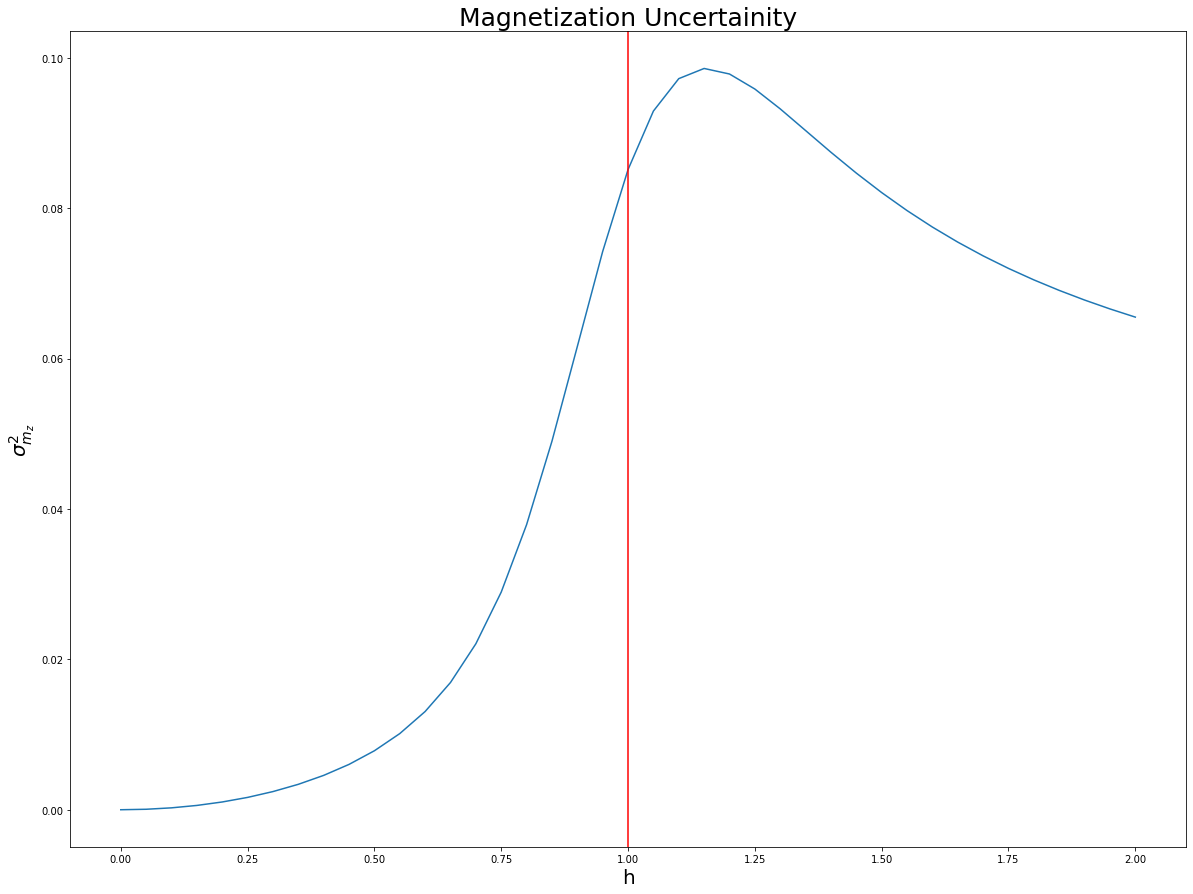

In [48]:
#Plot graph 
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,15))
plt.plot(h_array,variance_list)
plt.title("Magnetization Uncertainity",size=25)
plt.ylabel(r"$\sigma^{2}_{m_z}$",size=20)
plt.xlabel(rf"h",size=20)
plt.axvline(1,color="red")